The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


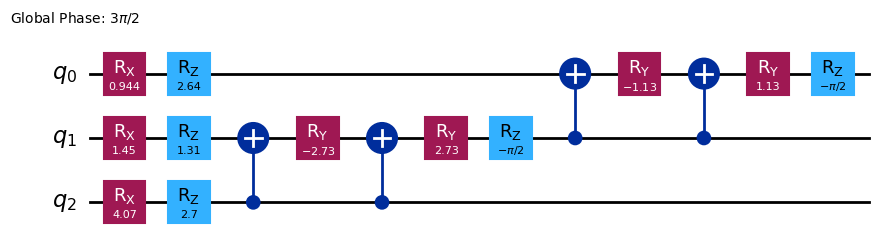

In [44]:
import qiskit
import ansatz
%load_ext autoreload
%autoreload 2


# Benchmark from quanvolutional1 to quanvolutional19
num_qubits = 3
qc = qiskit.QuantumCircuit(num_qubits) 
qc = ansatz.quanvolutional3(qc)
qc.draw(output='mpl')
qc_trans = qiskit.transpile(qc, basis_gates=['h', 's', 'cx', 'rx', 'ry', 'rz'], optimization_level=3)
qc_trans.draw(output='mpl')

In [45]:
np.e**(1j*np.pi)

(-1+1.2246467991473532e-16j)

In [ ]:
import qiskit.quantum_info

import numpy as np
phase = np.e**(1j*qc_trans.global_phase)
if qc_trans.global_phase > np.pi:
    phase *= -1

# FROM ORIGINAL CIRCUITS
print(qiskit.quantum_info.Statevector.from_instruction(qc).data)

# THIS IS THE EXPECTED OUTPUT
print(qiskit.quantum_info.Statevector.from_instruction(qc_trans).data/phase)

[ 0.37408604-0.46805246j -0.15134454-0.10790417j  0.04041152+0.04006523j
 -0.07961138+0.0744405j  -0.49147317+0.47295087j  0.15485994+0.14418086j
 -0.08737094-0.09892484j  0.19566852-0.16005084j]
[ 0.37408604-0.46805246j -0.15134454-0.10790417j  0.04041152+0.04006523j
 -0.07961138+0.0744405j  -0.49147317+0.47295087j  0.15485994+0.14418086j
 -0.08737094-0.09892484j  0.19566852-0.16005084j]


In [ ]:

qc.draw(output='mpl')

In [ ]:
# convert to readable files

from qimax import converter, constant

texts = []
texts.append(len(qc.data))
for gate in qc.data:
    name = gate.name.upper()
    params = None
    wires = converter.get_wires_of_gate(gate)
    if name == 'CX':
        type = 2
    else:
        type = 1
        gate_entries = constant.constant_gate[name]
        if name in ['RX', 'RY', 'RZ']:
            params = gate.params[0]
            gate_entries = gate_entries(params)
    texts.append(type)
    if type == 2:
        texts.append(wires[0])
        texts.append(wires[1])
    else:
        texts.append(wires[0])
        texts.append(gate_entries[0][0])
        texts.append(gate_entries[0][1])
        texts.append(gate_entries[1][0])
        texts.append(gate_entries[1][1])

with open('output.txt', 'w') as f:
    for item in texts:
        f.write("%s\n" % item)

In [ ]:
#  RESULT FROM QISKIT
qc_qiskit = (qiskit.quantum_info.Statevector.from_instruction(qc).data)
print(qc_qiskit)

[-0.01927488+0.47331835j  0.54087456+0.10611312j -0.06770304-0.01672037j
  0.01557706-0.49124734j  0.13963193+0.30374403j -0.21151439+0.0803382j
 -0.06255804+0.0214577j   0.13525991+0.1993585j ]


In [ ]:
# Calculate error

import numpy as np

def fidelity(state1: np.ndarray, state2: np.ndarray):
    state1 = np.expand_dims(state1, axis=0)
    state2 = np.expand_dims(state2, axis=0)
    return (np.abs(np.inner(np.conjugate(state1), state2))**2)[0][0]


def mse(state1: np.ndarray, state2: np.ndarray):
    return np.mean(np.abs(state1 - state2)**2)

qc_fpga = ?
print(fidelity(qc_qiskit, qc_fpga))
print(mse(qc_qiskit, qc_fpga))